In [1]:
import pyspark
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files

# Upload the file without displaying it
uploaded = files.upload()

# Save the uploaded file
for file_name in uploaded.keys():
    print(f"File {file_name} uploaded successfully.")


Saving credit_risk_dataset.csv to credit_risk_dataset (3).csv
File credit_risk_dataset (3).csv uploaded successfully.


In [3]:
data_credit = pd.read_csv('credit_risk_dataset (2).csv')

In [4]:
data_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
data_credit.shape

(32581, 12)

In [6]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
data_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
data_credit.isnull().count()

,0
person_age,32581
person_income,32581
person_home_ownership,32581
person_emp_length,32581
loan_intent,32581
loan_grade,32581
loan_amnt,32581
loan_int_rate,32581
loan_status,32581
loan_percent_income,32581


In [10]:
data_credit.drop_duplicates().count()

,0
person_age,32416
person_income,32416
person_home_ownership,32416
person_emp_length,31529
loan_intent,32416
loan_grade,32416
loan_amnt,32416
loan_int_rate,29321
loan_status,32416
loan_percent_income,32416


In [11]:
data_credit.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [12]:
data_credit.value_counts().head()

person_age  person_income  person_home_ownership  person_emp_length  loan_intent        loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length
32          65000          MORTGAGE               6.0                PERSONAL           B           5600       11.58          0            0.09                 N                          5                             2
25          78000          MORTGAGE               0.0                HOMEIMPROVEMENT    B           25000      9.64           0            0.32                 N                          4                             2
28          80004          MORTGAGE               5.0                MEDICAL            A           12000      6.91           0            0.15                 N                          6                             2
25          43200          OWN                    9.0                VENTURE            B           13800      11.48          0            0.32                 N                          2                             2
            75996          MORTGAGE               9.0                DEBTCONSOLIDATION  B           10000      11.99          0            0.13                 N                          3                             2
Name: count, dtype: int64

visulaization

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [15]:
categorical_columns =data_credit.select_dtypes(include = ['object', 'category'])
numerical_columns = data_credit.select_dtypes(include=['int64', 'float64'])


In [16]:
print("Categorical columns:")
categorical_columns.head(5)

Categorical columns:


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [17]:
print("\nNumerical columns:")
numerical_columns.head(5)


Numerical columns:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4


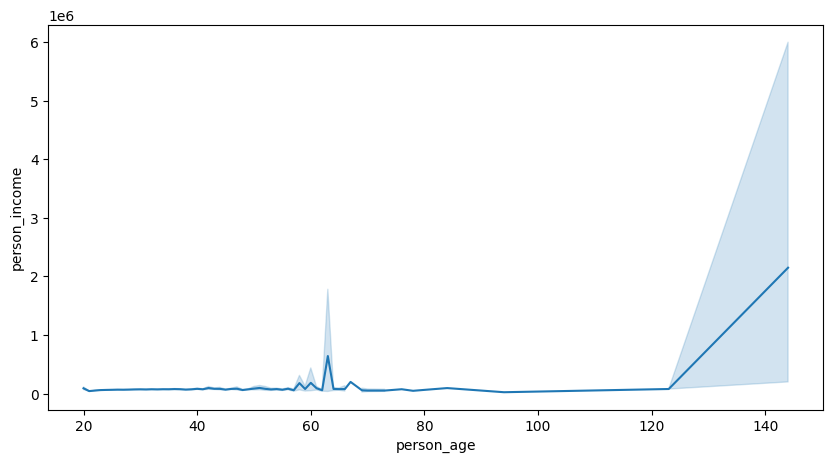

In [18]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='person_age', y='person_income', data=data_credit, ax=ax)
plt.show()

Now we can see that there is outlier in person_age. So now we can handle outlier with IQR method

In [19]:
Q1 = data_credit['person_age'].quantile(0.25)
Q3 = data_credit['person_age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_credit = data_credit[(data_credit['person_age'] >= 18) & (data_credit['person_age'] <= 90)]
data_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


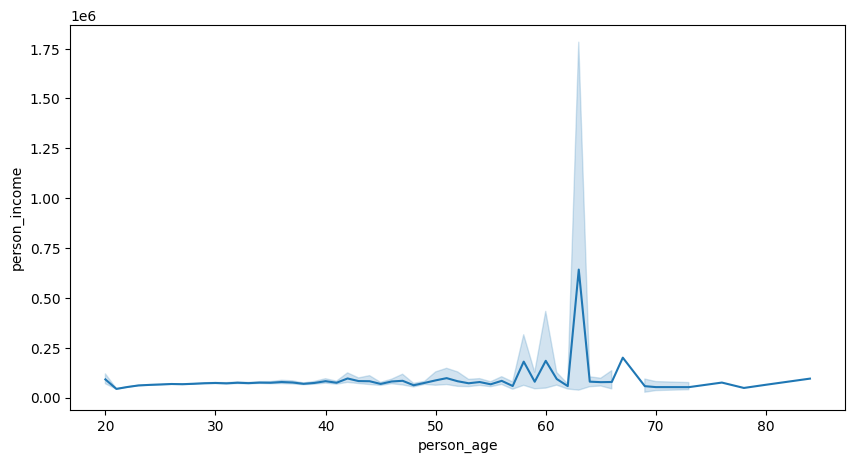

In [20]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='person_age', y='person_income', data=data_credit, ax=ax)
plt.show()

In [21]:
print(data_credit['person_age'].describe())

count    32575.000000
mean        27.716009
std          6.194207
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         84.000000
Name: person_age, dtype: float64


In [22]:
data_credit = data_credit[(data_credit['person_age'] >= 18) & (data_credit['person_age'] <= 100)]
data_credit = data_credit[data_credit['person_income'] <= 1e6]

In [23]:
data_credit.head(6)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


Data Visulaization


In [24]:
data_credit_loan_status = print(data_credit['loan_status']. value_counts())
data_credit_loan_status


loan_status
0    25459
1     7108
Name: count, dtype: int64


In [25]:
data_credit_person_income = data_credit['person_income'].value_counts()
data_credit_person_income.describe()

,count
count,4288.000000
mean,7.594916
std,43.093573
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1046.000000


In [26]:
person_age_income = (
    data_credit.groupby('person_age')['loan_status'].value_counts().reset_index()

)

total_counts = person_age_income.groupby("person_age")["count"].transform('sum')

person_age_income["percentage"] = (person_age_income["count"] / total_counts) * 100

print(person_age_income)

     person_age  loan_status  count  percentage
0            20            0     13   86.666667
1            20            1      2   13.333333
2            21            0    857   69.731489
3            21            1    372   30.268511
4            22            0   2749   75.667492
..          ...          ...    ...         ...
97           73            0      3  100.000000
98           76            0      1  100.000000
99           78            0      1  100.000000
100          80            0      1  100.000000
101          84            0      1  100.000000

[102 rows x 4 columns]


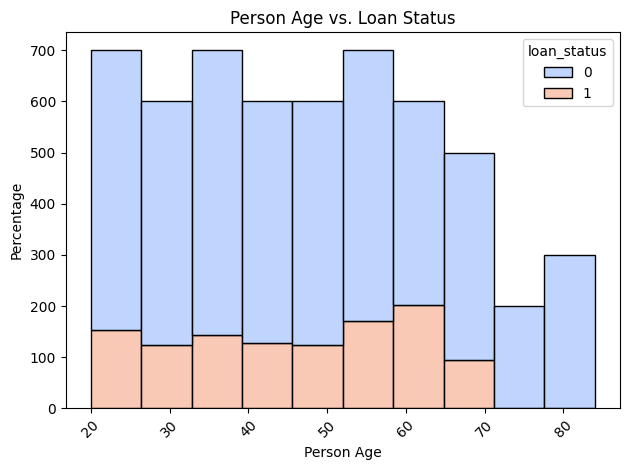

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for person age vs loan status
sns.histplot(
    data=person_age_income,
    x="person_age",
    weights="percentage",
    hue="loan_status",
    multiple="stack",
    palette="coolwarm"
)

# Set plot title and labels
plt.title("Person Age vs. Loan Status")
plt.xlabel("Person Age")
plt.ylabel("Percentage")
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


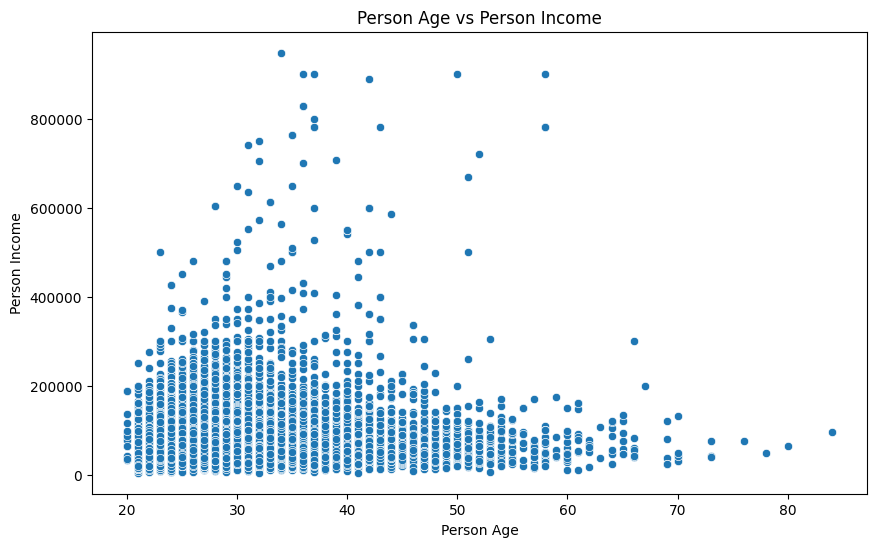

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_credit['person_age'], y=data_credit['person_income'])
# Set the title and labels
plt.title('Person Age vs Person Income')
plt.xlabel('Person Age')
plt.ylabel('Person Income')

# Show the plot
plt.show()


In [29]:
data_credit.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [30]:
data_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

          loan_intent  loan_status  count
0   DEBTCONSOLIDATION            0   3721
1   DEBTCONSOLIDATION            1   1490
2           EDUCATION            0   5339
3           EDUCATION            1   1111
4     HOMEIMPROVEMENT            0   2664
5     HOMEIMPROVEMENT            1    941
6             MEDICAL            0   4447
7             MEDICAL            1   1621
8            PERSONAL            0   4421
9            PERSONAL            1   1098
10            VENTURE            0   4867
11            VENTURE            1    847


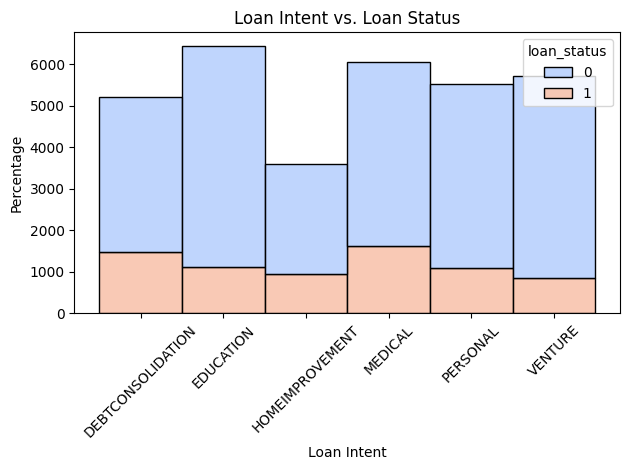

In [31]:
loan_intent_data = (data_credit.groupby('loan_intent')['loan_status'].value_counts().reset_index())

print(loan_intent_data)

sns.histplot(
    data=loan_intent_data,
    x="loan_intent",
    weights="count",
    hue="loan_status",
    multiple="stack",
    palette="coolwarm"
)


plt.title("Loan Intent vs. Loan Status")
plt.xlabel("Loan Intent")
plt.ylabel("Percentage")
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


   loan_grade  loan_status  count  percentage
0           A            0   9698   90.038065
1           A            1   1073    9.961935
2           B            0   8747   83.719372
3           B            1   1701   16.280628
4           C            0   5114   79.249961
5           C            1   1339   20.750039
6           D            1   2141   59.045780
7           D            0   1485   40.954220
8           E            1    621   64.419087
9           E            0    343   35.580913
10          F            1    170   70.539419
11          F            0     71   29.460581
12          G            1     63   98.437500
13          G            0      1    1.562500


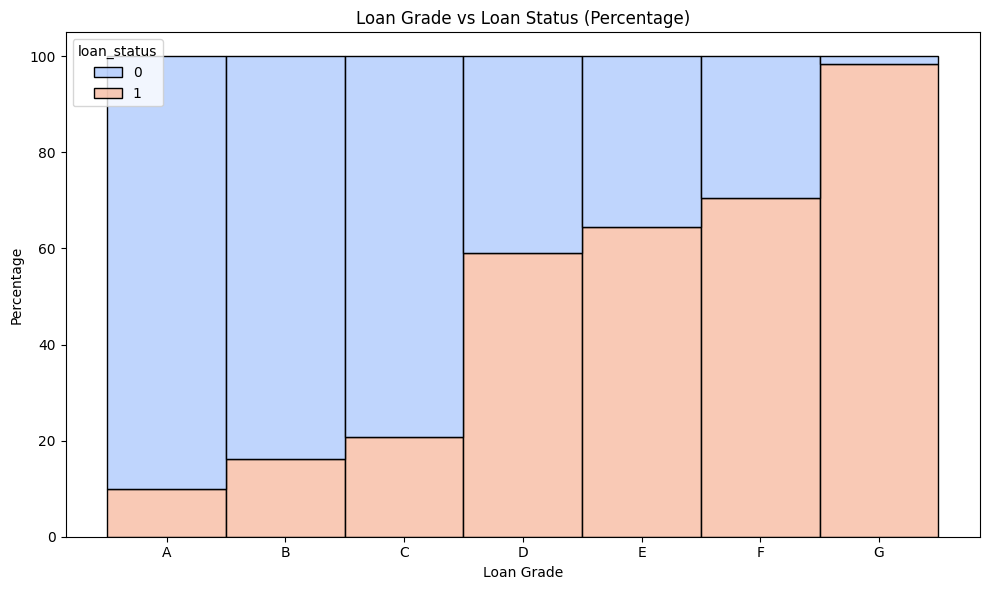

In [32]:
grade_status_data = (data_credit.groupby('loan_grade')['loan_status'].value_counts().reset_index())

total_counts = grade_status_data.groupby("loan_grade")["count"].transform('sum')

grade_status_data["percentage"] = (grade_status_data["count"] / total_counts) * 100

print(grade_status_data)

plt.figure(figsize=(10, 6))
sns.histplot(
    data=grade_status_data,
    x='loan_grade',
    weights='percentage',
    hue='loan_status',
    palette='coolwarm',
    multiple='stack'
)

# Add plot labels and title
plt.title("Loan Grade vs Loan Status (Percentage)")
plt.xlabel("Loan Grade")
plt.ylabel("Percentage")
plt.tight_layout()

# Show the plot
plt.show()

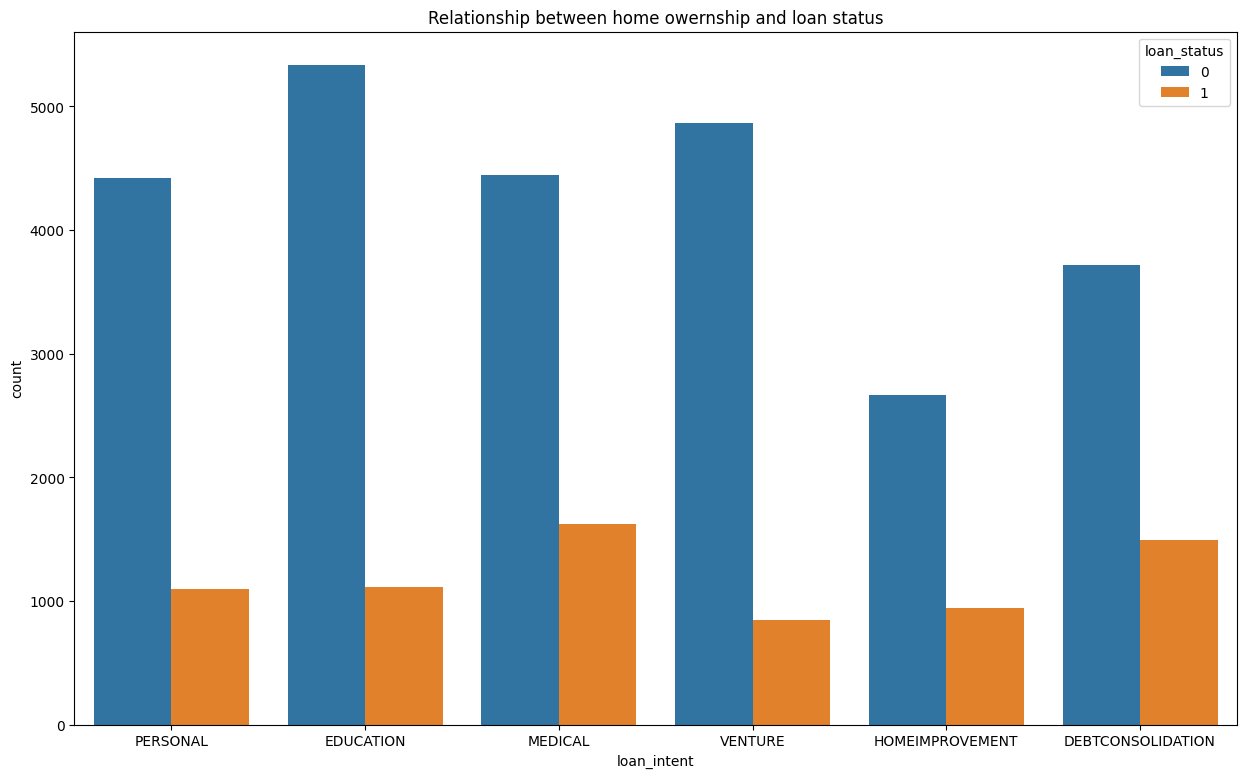

In [33]:
plt.figure(figsize=(15,9))
sns.countplot(data = data_credit, x = 'loan_intent', hue = 'loan_status')
plt.title("Relationship between home owernship and loan status")
plt.show()


In [34]:
print(data_credit.isna().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3112
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_credit['loan_status'] = le.fit_transform(data_credit['loan_status'])

In [36]:
data_credit = pd.get_dummies(data_credit, columns=['loan_grade', 'loan_intent'])
data_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,RENT,123.0,35000,16.02,1,0.59,Y,3,...,True,False,False,False,False,False,False,False,True,False
1,21,9600,OWN,5.0,1000,11.14,0,0.10,N,2,...,False,False,False,False,False,True,False,False,False,False
2,25,9600,MORTGAGE,1.0,5500,12.87,1,0.57,N,3,...,False,False,False,False,False,False,False,True,False,False
3,23,65500,RENT,4.0,35000,15.23,1,0.53,N,2,...,False,False,False,False,False,False,False,True,False,False
4,24,54400,RENT,8.0,35000,14.27,1,0.55,Y,4,...,False,False,False,False,False,False,False,True,False,False


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.exceptions import NotFittedError

Separate features and target


In [38]:
X = data_credit.drop(columns=['loan_status'])
y = data_credit['loan_status']

In [39]:
categorical_columns

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,...,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
32035,38,53052,RENT,0.0,8000,NaN,0.15,N,15,False,...,False,False,False,False,False,True,False,False,False,False
13318,24,90000,MORTGAGE,4.0,1700,10.75,0.02,N,3,False,...,False,False,False,False,False,False,False,False,False,True
1342,25,28000,RENT,6.0,1000,7.51,0.04,N,3,True,...,False,False,False,False,True,False,False,False,False,False
11231,25,52000,RENT,1.0,10000,6.91,0.19,N,2,True,...,False,False,False,False,False,False,True,False,False,False
19380,33,23004,RENT,6.0,3000,13.43,0.13,Y,5,False,...,False,False,False,False,False,False,False,False,True,False


In [43]:
y_train.head(4)

,loan_status
32035,0
13318,0
1342,0
11231,0


In [44]:
# Step 4: Build the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [45]:
X.columns = X.columns.str.strip().str.lower()

In [46]:
# Verify available colum
categorical_columns = [col for col in categorical_columns if col in X.columns]
numerical_columns = [col for col in numerical_columns if col in X.columns]

In [47]:
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [48]:
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)
print("DataFrame columns:", X.columns)


Numerical columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical columns: ['person_home_ownership', 'cb_person_default_on_file']
DataFrame columns: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_grade_a', 'loan_grade_b',
       'loan_grade_c', 'loan_grade_d', 'loan_grade_e', 'loan_grade_f',
       'loan_grade_g', 'loan_intent_debtconsolidation',
       'loan_intent_education', 'loan_intent_homeimprovement',
       'loan_intent_medical', 'loan_intent_personal', 'loan_intent_venture'],
      dtype='object')


In [49]:
numerical_columns = [col for col in numerical_columns if col in X.columns]
categorical_columns = [col for col in categorical_columns if col in X.columns]

In [50]:
OneHotEncoder(handle_unknown='ignore')


OneHotEncoder(handle_unknown='ignore')

In [51]:
X[numerical_columns] = X[numerical_columns].apply(pd.to_numeric, errors='coerce')
X[categorical_columns] = X[categorical_columns].astype(str)


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Example numerical and categorical column lists
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
                     'loan_percent_income', 'cb_person_cred_hist_length']
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Verify columns exist in the DataFrame
numerical_columns = [col for col in numerical_columns if col in X.columns]
categorical_columns = [col for col in categorical_columns if col in X.columns]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Debug information
print("Validated Numerical Columns:", numerical_columns)
print("Validated Categorical Columns:", categorical_columns)


Validated Numerical Columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Validated Categorical Columns: ['person_home_ownership', 'cb_person_default_on_file']


In [53]:
preprocessor.fit(X)
X_preprocessed = preprocessor.transform(X)
print("Shape of preprocessed data:", X_preprocessed.shape)


Shape of preprocessed data: (32567, 13)


In [54]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (32567, 22)
Shape of y: (32567,)


In [55]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [56]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (26053, 22)
Shape of X_test: (6514, 22)
Shape of y_train: (26053,)
Shape of y_test: (6514,)


In [57]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Encode categorical columns
    ]
)

# Define the model
model = RandomForestClassifier(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])


In [58]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'cb_person_default_on_file'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [59]:
y_pred = pipeline.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate predictions
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9000614062020265
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      5115
           1       0.86      0.63      0.73      1399

    accuracy                           0.90      6514
   macro avg       0.89      0.80      0.84      6514
weighted avg       0.90      0.90      0.89      6514



In [61]:
from sklearn.metrics import accuracy_score
total_predictions = len(y_pred)
# Count the number of defaulters and non-defaulters
num_defaulters = sum(y_pred)  # Assuming defaulters are labeled as '1'
num_non_defaulters = total_predictions - num_defaulters

# Calculate percentages
percentage_defaulters = (num_defaulters / total_predictions) * 100
percentage_non_defaulters = (num_non_defaulters / total_predictions) * 100

# Print results
print(f"Percentage of Defaulters: {percentage_defaulters:.2f}%")
print(f"Percentage of Non-Defaulters: {percentage_non_defaulters:.2f}%")

Percentage of Defaulters: 15.75%
Percentage of Non-Defaulters: 84.25%


In [62]:
import joblib
joblib.dump(pipeline, 'loan_default_logistic_regression_model.pkl')

['loan_default_logistic_regression_model.pkl']

In [63]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Count the number of predicted defaulters (where prediction is 1)
num_defaulters = (y_pred == 1).sum()

# Print the result
print(f"Number of predicted defaulters: {num_defaulters}")

Number of predicted defaulters: 1026


In [64]:
# Count the actual number of defaulters in the test set
actual_defaulters = (y_test == 1).sum()

# Print the result
print(f"Number of actual defaulters: {actual_defaulters}")

Number of actual defaulters: 1399


In [65]:
print(f"Actual defaulters: {actual_defaulters}")
print(f"Predicted defaulters: {num_defaulters}")

Actual defaulters: 1399
Predicted defaulters: 1026


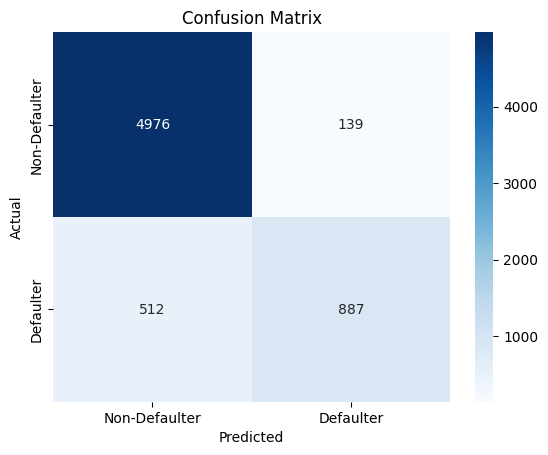

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Defaulter', 'Defaulter'], yticklabels=['Non-Defaulter', 'Defaulter'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Confusion** **Matrix** **Explanation**



*   **True Positives (TP):** Defaulters correctly predicted as deflauters
*   **False Positive(FP):** Non- Deflauters incorrectly predicted as defluaters.
*   **True Negative (TN):** Non - Defaulters correctly predicted as non - deflauters
*   **False Negative (FN):** Deflauters incorrectly predicted as non-defaulters






